In [1]:
# !pip install yfinance --upgrade
# !pip install mysql-connector-python
# !pip install mplfinance
# !pip install gradio

### use csv to test


In [178]:
data.to_csv('data_backup.csv')

In [181]:
data = pd.read_csv('data_backup.csv', index_col=0)

,date,open,high,low,close,adj_close,volume,symbol
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876122,135480400,AAPL
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167618,146322800,AAPL
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200,AAPL
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000,AAPL
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200,AAPL
...,...,...,...,...,...,...,...,...
1164,2024-08-19,10.560000,10.750000,10.540000,10.720000,10.720000,41066300,F
1165,2024-08-20,10.700000,10.790000,10.610000,10.680000,10.680000,32468000,F
1166,2024-08-21,10.840000,10.970000,10.750000,10.850000,10.850000,48943900,F
1167,2024-08-22,10.850000,11.010000,10.840000,10.920000,10.920000,50885400,F


### Data Collection

In [101]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import style
import mysql.connector
import mplfinance as mpf
import warnings

warnings.filterwarnings('ignore')

In [174]:
# data = yf.download("AMZN AAPL GOOG", start="2020-01-01", end="2024-08-27")
# stock = yf.Ticker("aapl")
# data = stock.history(start="2020-01-01", end="2024-08-27", interval="1d")
def get_history_data(symbol, start, end):
    data = yf.download(symbol, start, end)
    return data

In [175]:
def download_from_yahoo(symbol):
    start = "2020-01-01"
    end = "2024-08-26"
    data = get_history_data(symbol, start, end)
    data.reset_index(inplace=True)
    data.columns = ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
    data['symbol'] = symbol
    data['date'] = data['date'].astype(str)
    
    new_order = ['symbol', 'date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
    data = data[new_order]
    return data

In [176]:
stock_list = pd.read_csv('stock_list.txt', header=None)[0].tolist()
data_list = []
for symbol in stock_list:
    start = "2020-01-01"
    end = "2024-08-26"
    data_sub = get_history_data(symbol, start, end)
    data_sub.reset_index(inplace=True)
    data_sub.columns = ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
    data_sub['symbol'] = symbol
    data_sub['date'] = data_sub['date'].astype(str)
    data_list.append(data_sub)
data = pd.concat(data_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
data['date'] = data['date'].astype(str)

In [ ]:
# data = pd.read_csv('demo.csv')

In [10]:
data.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
symbol        object
dtype: object

In [ ]:
# data = data[['Price', 'Adj Close']].iloc[2:]
# data.reset_index(drop=True, inplace=True)
# data.columns = ['date', 'close']

In [ ]:
# data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d').dt.date
# data['date'] = data['date'].str.slice(0, 10)

In [ ]:
# data['close'] = data['close'].astype('float')

In [ ]:
# data.dtypes

### Write into DB

CREATE SCHEMA `project_demo` ;

CREATE TABLE `project_demo`.`stock_data` (
  `symbol` VARCHAR(20) NOT NULL,
  `date` VARCHAR(10) NOT NULL,
  `open` FLOAT NULL,
  `high` FLOAT NULL,
  `low` FLOAT NULL,
  `close` FLOAT NULL,
  `adj_close` FLOAT NULL,
  `volume` INT NULL,
  PRIMARY KEY (`symbol`, `date`));

In [5]:
connection = mysql.connector.connect(
    host='127.0.0.1',       # MySQL服务器地址
    port='3306',
    user='root',   # MySQL用户名
    password='21222122bbme', # MySQL密码
    database='project_demo'  # 目标数据库名
)
cursor = connection.cursor()

In [11]:
sql = """
    INSERT INTO stock_data (date, open, high, low, close, adj_close, volume, symbol)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

for index, row in data.iterrows():
    cursor.execute(sql, (
        row['date'], 
        row['open'], 
        row['high'], 
        row['low'], 
        row['close'], 
        row['adj_close'], 
        row['volume'], 
        row['symbol']
    ))

connection.commit()
cursor.close()
connection.close()

In [14]:
# df=data

### Read from DB

In [29]:
def roll_back_days(time_str):
    time_format = '%Y-%m-%d'
    time_obj = datetime.strptime(time_str, time_format)
    time_obj -= timedelta(days=30)
    new_time_str = time_obj.strftime(time_format)
    return new_time_str

In [30]:
def read_from_db(symbol, start, end):
    start = roll_back_days(start)
    connection = mysql.connector.connect(
        host='127.0.0.1',       # MySQL服务器地址
        port='3306',
        user='root',   # MySQL用户名
        password='21222122bbme', # MySQL密码
        database='project_demo'  # 目标数据库名
    )
    cursor = connection.cursor()
    query = '''
    SELECT * FROM stock_data WHERE symbol = %s 
    AND date >= %s AND date <= %s;
    '''

    cursor.execute(query, (symbol, start, end))
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    data = pd.DataFrame(data, columns=columns)
    # print(data)

    cursor.close()
    connection.close()
    return data

In [58]:
# Input!!!
symbol = "JD"
start, end = '2024-01-01', '2024-08-27'
length = 14
method = "sma"

In [59]:
stock_list = pd.read_csv('stock_list.txt', header=None)[0].tolist()
if symbol in stock_list:
    # Read from DataBase
    data = read_from_db(symbol, start, end)
else:
    data = download_from_yahoo(symbol)
data.set_index('date', inplace=True)  

[*********************100%***********************]  1 of 1 completed


In [60]:
data

,symbol,open,high,low,close,adj_close,volume
date,,,,,,,
2020-01-02,JD,35.959999,37.759998,35.900002,37.730000,35.245708,22688700
2020-01-03,JD,36.779999,38.540001,36.680000,37.990002,35.488594,16929900
2020-01-06,JD,37.459999,38.080002,37.380001,38.000000,35.497932,9740100
2020-01-07,JD,38.080002,38.610001,37.639999,38.320000,35.796864,10131300
2020-01-08,JD,38.020000,38.849998,37.980000,38.299999,35.778179,11434700
...,...,...,...,...,...,...,...
2024-08-19,JD,29.080000,29.709999,29.030001,29.540001,29.540001,12534600
2024-08-20,JD,28.650000,28.760000,27.790001,28.190001,28.190001,26334300
2024-08-21,JD,26.040001,27.040001,25.850000,27.020000,27.020000,86065300


In [ ]:
# delta = data['close'].diff()
# delta = delta[1:] 
# # Make the positive gains (up) and negative gains (down) Series
# up, down = delta.clip(lower=0), delta.clip(upper=0).abs()
# down

In [ ]:
# start, end = '2024-01-01', '2024-08-27'
# data.loc[start:end]['close']

### Calculate RSI

In [129]:
# Define function to calculate the RSI
def calc_rsi(data, start, end, length=14, func_name='sma'):
    data.reset_index(inplace=True)
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

    # Get the difference in price from previous step
    data = data.loc[roll_back_days(start):end]
    delta = data['adj_close'].diff()
#     print(delta)
    # Get rid of the first row, which is NaN since it did not have a previous row to calculate the differences
#     delta = delta[1:] 

    # Make the positive gains (up) and negative gains (down) Series
    up, down = delta.clip(lower=0), delta.clip(upper=0).abs()
    
    if func_name == 'sma':
        fn_roll = lambda s: s.rolling(length).mean()
    elif func_name == 'ema':
        fn_roll = lambda s: s.ewm(span=length).mean()
    roll_up, roll_down = fn_roll(up), fn_roll(down)
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))

#     # Avoid division-by-zero if `roll_down` is zero
#     # This prevents inf and/or nan values.
#     rsi[:] = np.select([roll_down == 0, roll_up == 0, True], [100, 0, rsi])
#     # rsi = rsi.case_when([((roll_down == 0), 100), ((roll_up == 0), 0)])  # This alternative to np.select works only for pd.__version__ >= 2.2.0.
#     rsi.name = 'rsi'
    return rsi.loc[start:end]

# Calculate RSI using MA of choice
# Reminder: Provide ≥ `1 + length` extra data points!
rsi = calc_rsi(data, start=start, end=end, length=length, func_name=method)

In [130]:
rsi

date
2024-01-02    57.633591
2024-01-03    61.084220
2024-01-04    58.879391
2024-01-05    52.186882
2024-01-08    42.455769
                ...    
2024-08-19    72.844833
2024-08-20    60.869571
2024-08-21    60.722894
2024-08-22    58.604646
2024-08-23    60.955701
Name: close, Length: 163, dtype: float64

In [ ]:
# red_y = pd.Series(red_y)
# red_y.index = rsi.index
# red_y.dropna()


In [ ]:
# black_y.dropna()

In [ ]:
# lower_bound, upper_bound = np.percentile(rsi, 25), np.percentile(rsi, 75)

In [67]:
axes.get_xticks()

array([0])

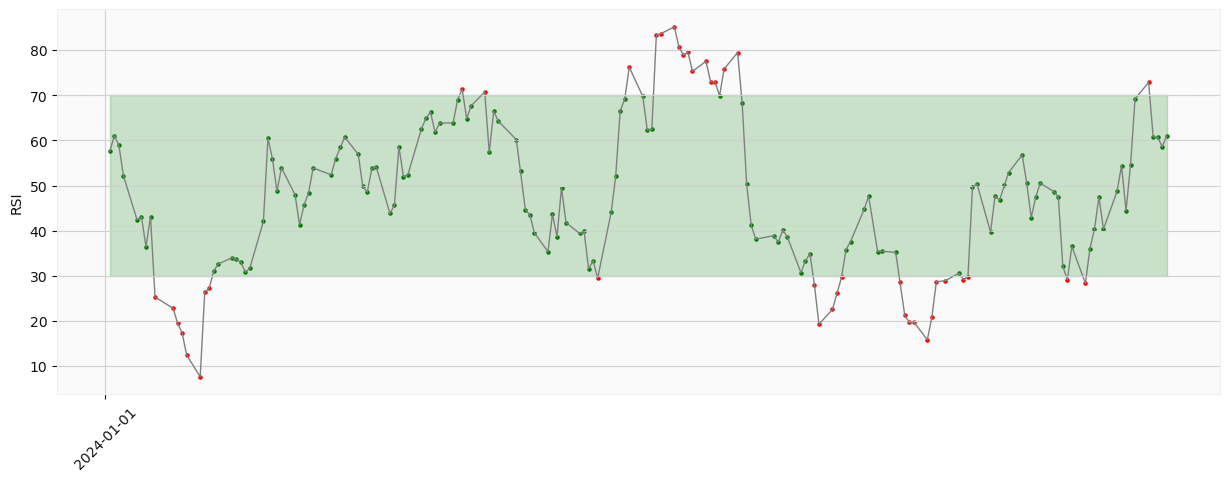

In [131]:
# style.use('ggplot')
lower_bound, upper_bound = 30, 70
red_y = np.where((rsi < lower_bound) | (rsi > upper_bound), rsi, np.nan)
red_y = pd.Series(red_y)
red_y.index = rsi.index
# red_y.dropna(inplace=True)

green_y = np.where((rsi >= lower_bound) & (rsi <= upper_bound), rsi, np.nan)
green_y = pd.Series(green_y)
green_y.index = rsi.index

fig, axes = plt.subplots(figsize=(15,5))   # subplots(1,2) is one-dimension array
axes.plot(rsi.index, rsi, color='grey', linewidth=1)
# axes.plot(rsi.index, red_y, color='red', linewidth=1)  
# axes.plot(rsi.index, black_y, color='black', linewidth=1)
axes.scatter(rsi.index, red_y, color='red', s=5) 
axes.scatter(rsi.index, green_y, color='green', s=5) 

axes.axhline(y=lower_bound, color='lightgrey', linestyle='--', linewidth=0.8)  
axes.axhline(y=upper_bound, color='lightgrey', linestyle='--', linewidth=0.8)  

axes.fill_between(rsi.index, lower_bound, upper_bound, color='green', alpha=0.2)
# axes.set_xlabel("Date")
axes.set_ylabel("RSI")
interval = len(rsi.index)
axes.set_xticks(axes.get_xticks()[::interval])
# axes.set_xticktlabels(data.index[::10].strftime("%Y-%m-%d"), rotation=30)
axes.xaxis.set_tick_params(rotation=45)
axes.grid(True)
fig.show()

In [98]:
def calc_moving_average(close, func_name, length=14):
    if func_name == 'sma':
        fn_roll = lambda s: s.rolling(length).mean()
    elif func_name == 'ema':
        fn_roll = lambda s: s.ewm(span=length).mean()
    return fn_roll(close)

date
2024-01-02       NaN
2024-01-03       NaN
2024-01-04       NaN
2024-01-05       NaN
2024-01-08       NaN
               ...  
2024-08-19    26.657
2024-08-20    26.931
2024-08-21    27.100
2024-08-22    27.166
2024-08-23    27.261
Name: close, Length: 163, dtype: float64


No handles with labels found to put in legend.


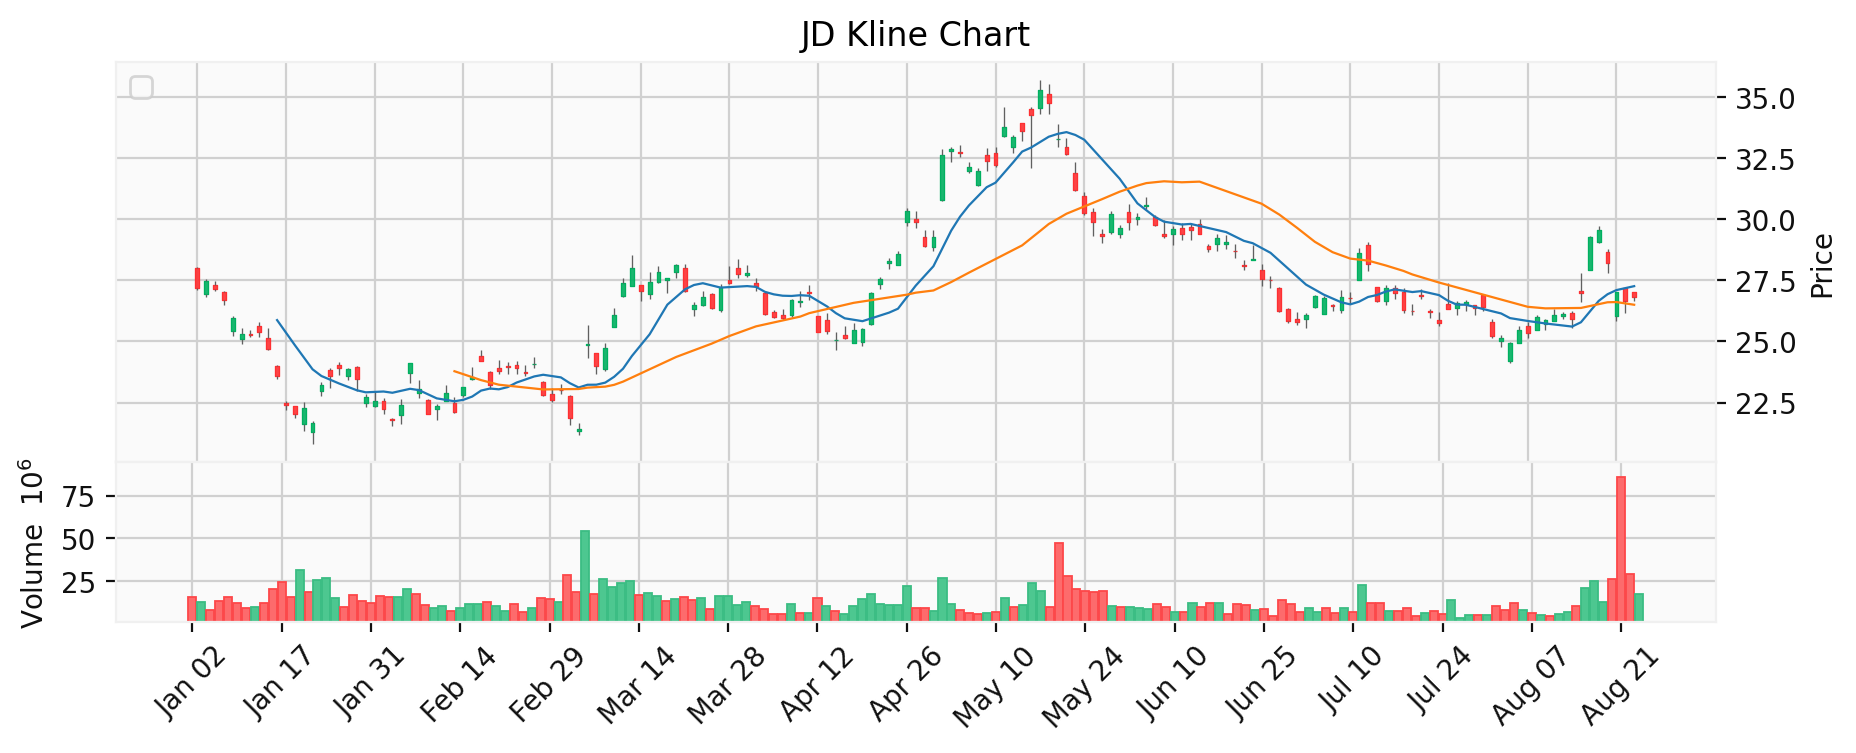

In [173]:
def kline(data, start_time, end_time, symbol, func_name):
    data = data[start_time:end_time]
    data.reset_index(inplace=True)
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
#     columns_mpl = ['open', 'high', 'low', 'close', 'volume']
    sma_10 = calc_moving_average(data['close'], func_name, 10)
    print(sma_10)
    sma_30 = calc_moving_average(data['close'], func_name, 30)
    fig = plt.figure(figsize=(8,4), dpi=200)
    ax = fig.add_axes([0,0.2,1,0.5])
    ax2 = fig.add_axes([0,0,1,0.2])
#     mpf.candelstick2_ochl(ax, data['open'], data['close'], data['high'], data['low'],
#                          width=0.5, colorup='r', colordown='g', alpha=0.6)
    mpf.plot(data, type='candle', volume=ax2, ax=ax, mav=[10,30], style='yahoo')
    
#     # 获取 10 日均线和 30 日均线数据
#     mav10 = data['close'].rolling(window=10).mean()
#     mav30 = data['close'].rolling(window=30).mean()

#     # 找到均线的最后一个值
#     last_mav10 = mav10.iloc[-1]
#     last_mav30 = mav30.iloc[-1]

#     # 设置右上角的位置（可调整）
#     x_pos = data.index[-1]
#     y_pos = data['Close'].max()  # 使用最大收盘价作为 y 轴位置

#     # 添加文本到图表
#     ax.text(x_pos, y_pos, '10-Day MA', color='blue', ha='right', va='top', fontsize=10)
#     ax.text(x_pos, y_pos * 0.95, '30-Day MA', color='orange', ha='right', va='top', fontsize=10)


#     ax.plot(sma_10.index, sma_10, label='10-Day Moving Average')
#     ax.plot(sma_30.index, sma_30, label='30-Day Moving Average')
    ax.set_xticks(range(0, len(data.index), 10))
    ax.set_title(f"{symbol} Kline Chart")
    ax.legend(loc="upper left")
    ax.grid(True)
    
#     mpf.volume_overlay(ax2, data['open'], data['close'], data['volume'],
#                       colorup='r', colordown='g', width=0.5, alpha=0.8)
    ax2.set_xticks(range(0, len(data.index), 10))
#     ax2.set_xticktlabels(data.index[::10].strftime("%Y-%m-%d"), rotation=30)
    ax2.grid(True)
    plt.show()
kline(data, start, end, symbol, func_name=method)

In [ ]:
over_buy_thr = 80
over_sell_thr = 20
over_buy = np.where(rsi > over_buy_thr, rsi, np.nan)
over_buy = pd.Series(over_buy)
over_buy.index = rsi.index
over_buy.dropna(inplace=True)
over_buy = over_buy.round(2)

over_sell = np.where(rsi < over_sell_thr, rsi, np.nan)
over_sell = pd.Series(green_y)
over_sell.index = rsi.index
over_sell.dropna(inplace=True)
over_sell = over_sell.round(2)

In [ ]:
over_buy.index

In [ ]:
# fig, ax = plt.subplots()  
# table = ax.table(cellText=[over_buy.values, over_buy.index], rowLabels=[0,1], loc='center') 
# ax.axis('off')  
# plt.show() 

In [ ]:
pd.DataFrame(over_buy).index